# FRE6971 Final

## Name : Chenyu Wang       NetID : cw2945

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data Preparation

In [2]:
data = pd.read_excel('CMT-Final.xlsx', index_col = 'Date')

In [3]:
sample_A = data.loc['2010-01-24':'2015-01-24']
sample_B = data.loc['2015-01-25':'2016-01-25']
sample_C = data.loc['2016-01-26':'2017-01-26']

### Sample_A

In [4]:
sample_A.tail()

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
2015-01-16,0.02,0.03,0.07,0.17,0.49,0.80,1.29,1.60,1.83,2.17,2.44
2015-01-20,0.01,0.03,0.08,0.17,0.53,0.85,1.31,1.61,1.82,2.15,2.39
2015-01-21,0.01,0.03,0.08,0.17,0.53,0.87,1.35,1.66,1.87,2.20,2.44
2015-01-22,0.02,0.03,0.08,0.17,0.53,0.90,1.39,1.69,1.90,2.21,2.46
2015-01-23,0.02,0.02,0.07,0.17,0.52,0.86,1.33,1.62,1.81,2.12,2.38


### Check if there is NA

In [5]:
print(sample_A.info())
print(sample_A.shape[0])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2010-01-25 to 2015-01-23
Data columns (total 11 columns):
1M     1252 non-null float64
3M     1252 non-null float64
6M     1252 non-null float64
1Y     1252 non-null float64
2Y     1252 non-null float64
3Y     1252 non-null float64
5Y     1252 non-null float64
7Y     1252 non-null float64
10Y    1252 non-null float64
20Y    1252 non-null float64
30Y    1252 non-null float64
dtypes: float64(11)
memory usage: 117.5 KB
None
1253


In [6]:
sample_A.dropna(inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
sample_A.shape[0]

1252

### Sample_B

In [8]:
sample_B.tail()

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
2016-01-19,0.21,0.26,0.37,0.48,0.88,1.11,1.49,1.82,2.06,2.45,2.82
2016-01-20,0.26,0.26,0.35,0.43,0.85,1.06,1.44,1.76,2.01,2.41,2.77
2016-01-21,0.27,0.28,0.38,0.44,0.84,1.06,1.44,1.77,2.02,2.42,2.79
2016-01-22,0.26,0.31,0.41,0.47,0.88,1.11,1.49,1.81,2.07,2.46,2.83
2016-01-25,0.25,0.31,0.42,0.47,0.88,1.10,1.47,1.79,2.03,2.42,2.80


### Check if there is NA

In [9]:
print(sample_B.info())
print(sample_B.shape[0])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-01-26 to 2016-01-25
Data columns (total 11 columns):
1M     251 non-null float64
3M     251 non-null float64
6M     251 non-null float64
1Y     251 non-null float64
2Y     251 non-null float64
3Y     251 non-null float64
5Y     251 non-null float64
7Y     251 non-null float64
10Y    251 non-null float64
20Y    251 non-null float64
30Y    251 non-null float64
dtypes: float64(11)
memory usage: 23.5 KB
None
251


### Sample_C

In [10]:
sample_C.tail()

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
2017-01-20,0.46,0.50,0.62,0.82,1.20,1.50,1.95,2.28,2.48,2.79,3.05
2017-01-23,0.46,0.51,0.59,0.79,1.16,1.43,1.88,2.19,2.41,2.72,2.99
2017-01-24,0.50,0.51,0.62,0.81,1.21,1.49,1.94,2.27,2.47,2.78,3.05
2017-01-25,0.48,0.50,0.61,0.82,1.23,1.52,1.99,2.33,2.53,2.84,3.10
2017-01-26,0.49,0.51,0.62,0.82,1.21,1.49,1.95,2.30,2.51,2.82,3.08


### Check if there is NA

In [11]:
print(sample_C.info())
print(sample_C.shape[0])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-26 to 2017-01-26
Data columns (total 11 columns):
1M     252 non-null float64
3M     252 non-null float64
6M     252 non-null float64
1Y     252 non-null float64
2Y     252 non-null float64
3Y     252 non-null float64
5Y     252 non-null float64
7Y     252 non-null float64
10Y    252 non-null float64
20Y    252 non-null float64
30Y    252 non-null float64
dtypes: float64(11)
memory usage: 23.6 KB
None
252


## Question 1

### Use Sample A to compute 5 cointegrated pairs of CMT rates: [2y,3y], [3y,5y], [2y,5y], [3y,7y], [5y,7y]

In [12]:
def CCA_Chou_Ng(data_set):
    
    ### data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    ### X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    ### X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    
    ### Sort it to get the least eigenvalue
    order = np.argsort(eig_val)
    eig_val = eig_val[order]
    eig_vec = eig_vec[:,order]
    eig_vec = pd.DataFrame(eig_vec)
    ### Get the weights
    w = eig_vec[0]
    weight = [1, w[1] / w[0]]
    return weight

In [13]:
pair_list = [['2Y','3Y'],['3Y','5Y'],['2Y','5Y'],['3Y','7Y'],['5Y','7Y']]
weight_list = []
for i in range(5):
    weight_list.append(CCA_Chou_Ng(sample_A[pair_list[i]])) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
### Get weight DataFrame
column_list = ['2Y 3Y', '3Y 5Y', '2Y 5Y', '3Y 7Y', '5Y 7Y']
dic = {}
for i in range(5):
    dic[column_list[i]] = weight_list[i]
pd.DataFrame(dic, index = ['weight 1', 'weight 2'])

,2Y 3Y,3Y 5Y,2Y 5Y,3Y 7Y,5Y 7Y
weight 1,1.000000,1.000000,1.000000,1.000000,1.000000
weight 2,-0.562704,-0.612821,-0.328021,-0.506237,-0.848176


## Question 2

### a. AR(1) model fitted to each of the 5 cointegrated vectors (Signal 1)

In [15]:
### Construct Series of each of the five cointeegrated vectors
def Get_sigA(data, weight_list, pair_list):
    series = []
    for i in range(len(weight_list)):
        se = data[pair_list[i][0]]*weight_list[i][0] + data[pair_list[i][1]]*weight_list[i][1]
        name = 'Coin ' + str(i)
        series.append(pd.DataFrame(se, index = data.index, columns = [name]))
    return series

In [16]:
### Get signal 1
Signal_1 = Get_sigA(sample_A, weight_list, pair_list)

In [17]:
def plot_list_df(data_list, title):
    fig = plt.figure(figsize = (20,10))
    legend_list = []
    for i in range(len(data_list)):
        plt.plot(data_list[i])
        legend_list.append(data_list[i].columns.values)
    plt.legend(legend_list)
    plt.title(title)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


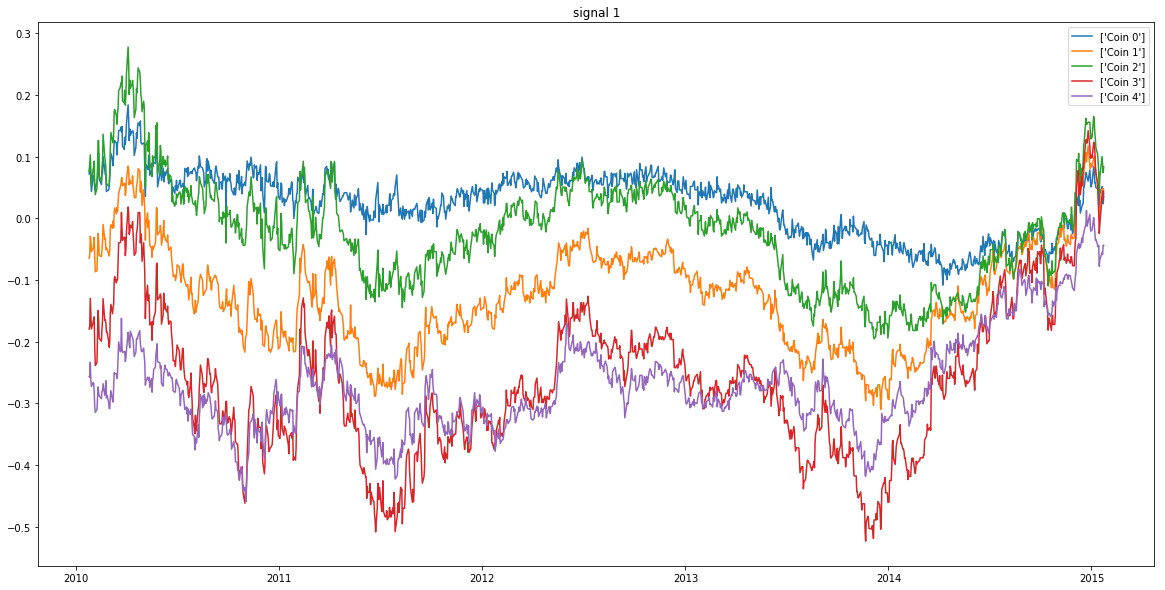

In [18]:
plot_list_df(Signal_1, 'signal 1')

Signal 1 is the part that we 'take away' nonstationary part of the series and leave only a constant and a white noise. However, the constant miu, in practice, is not a real constant. It also has it's own trend. In this part, we can easily see that signal one is a time-vairant constant plus a white noise. 

In [19]:
### Use AR(1) to fit each of the five cointegrated vectors
from statsmodels.tsa.ar_model import AR
def AR_1(Series):
    model = AR(Series.values)
    result = model.fit(maxlag = 1)
    para = result.params
    return [para[0], para[1]]

In [20]:
params_sig1 = []
for i in range(len(Signal_1)):
    para = AR_1(Signal_1[i])
    params_sig1.append(para)

In [21]:
### Get AR(1) parameters of signal1
dic = {}
for i in range(5):
    dic[column_list[i]] = params_sig1[i]
pd.DataFrame(dic, index = ['constant', 'phi'])

,2Y 3Y,3Y 5Y,2Y 5Y,3Y 7Y,5Y 7Y
constant,0.000863,-0.001377,-0.000389,-0.002155,-0.002498
phi,0.964746,0.988239,0.981495,0.991127,0.990072


### b. AR(1) model fitted to each {cointegrated vector - EMA($\lambda$)} (Signal 2)

In [22]:
def Half_Life(ts):
    ### Get y_t
    ts_shift = ts.drop(ts.index[0])
    ### Get y_t-1
    ts_back = ts.drop(ts.index[len(ts)-1])
    ts_back = sm.add_constant(np.array(ts_back))
    model = sm.OLS(np.array(ts_shift), ts_back)
    result = model.fit()
    phi = result.params[1]
    h = -np.log(2) / np.log(abs(phi))
    return h

In [23]:
def Get_SigB(signal_1):
    lambda_ = np.arange(0.001, 0.999, 0.001)
    opt_lam = []
    ### Find optimal lambda for each combinations
    for i in range(len(signal_1)):
        series = signal_1[i]
        HL_dist = []
        ### In each combinations, find the optimal lambda that makes half-life closest to 5
        for j in range(len(lambda_)):
            EMA = series.ewm(alpha = lambda_[j]).mean()
            signal_2 = series - EMA
            ### absolute value of half-life - 5 should be minimized
            HL = abs(Half_Life(signal_2) - 5)
            HL_dist.append(HL)
        ### Store all the lambda into dictionary and then change it to dataframe
        dic = {'lambda':lambda_, 'HL_dist':HL_dist}
        df = pd.DataFrame(dic)
        ### It could be eaiser for us to get the minimize spread and the corresponding lambda
        optimal_lamb = df.sort_values(by = ['HL_dist'], ascending = 1).iloc[0,0]
        opt_lam.append(optimal_lamb)
    signal_B = []
    ### Use the optimal lambda to compute signal2 
    for i in range(len(opt_lam)):
        series = signal_1[i]
        signal_2 = series - series.ewm(alpha = opt_lam[i]).mean()
        signal_B.append(signal_2)
    return  signal_B, opt_lam 

In [24]:
Signal_2, opt_lam = Get_SigB(Signal_1)

In [25]:
### Display Optimal lambda
dic = {}
for i in range(5):
    dic[column_list[i]] = opt_lam[i]
pd.DataFrame(dic, index = ['optimal lambda'])

,2Y 3Y,3Y 5Y,2Y 5Y,3Y 7Y,5Y 7Y
optimal lambda,0.013,0.079,0.049,0.101,0.082


Here, I use grid search to find a lambda that makes half-life closest to 5. The optimal lambda is displayed as above

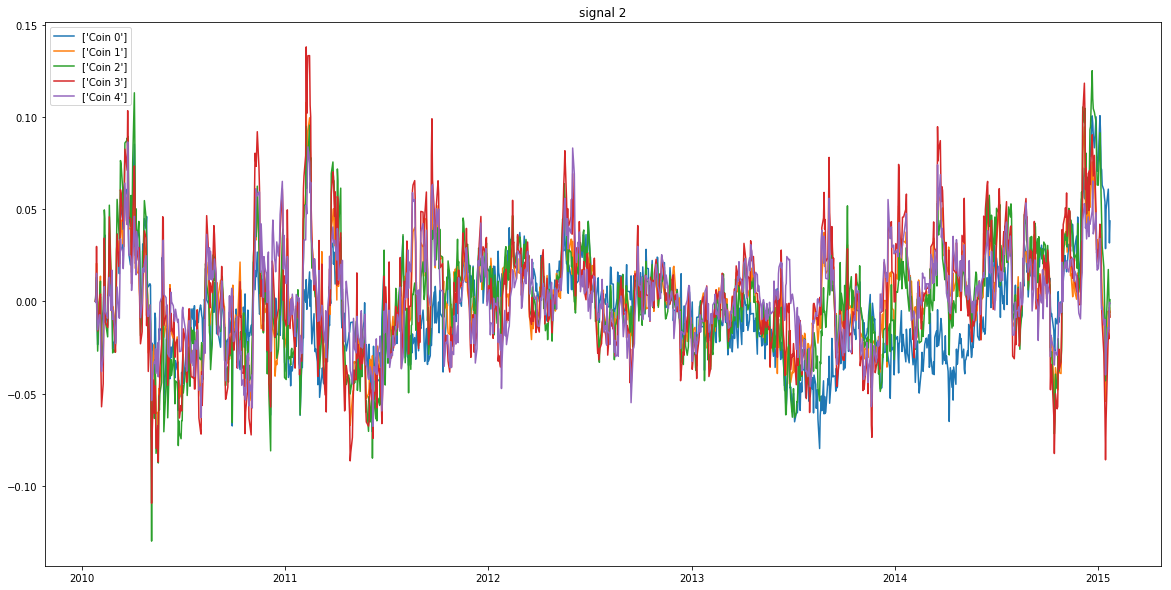

In [26]:
plot_list_df(Signal_2, 'signal 2')

What we do here is to move foward from signal 1. We 'take away' it's trend part of signal 1 (EMA) and only leave white noise. Here, we can see that our signal 2 is almost white noise of each combinations

In [27]:
params_sig2 = []
for i in range(len(Signal_2)):
    para = AR_1(Signal_2[i])
    params_sig2.append(para)

In [28]:
### Get AR(1) parameters for signal2
dic = {}
for i in range(5):
    dic[column_list[i]] = params_sig2[i]
pd.DataFrame(dic, index = ['constant', 'phi'])

,2Y 3Y,3Y 5Y,2Y 5Y,3Y 7Y,5Y 7Y
constant,-0.000673,0.000114,-0.000020,0.000196,0.000259
phi,0.871965,0.871076,0.870274,0.870685,0.870192


## Question 3

### Compute half-lives for all signals. Pick  to make sure that half-life of Signal 2 is ~5 days

In [29]:
Sig_A_HL = []
Sig_B_HL = []
for i in range(5):
    Sig_A_HL.append(Half_Life(Signal_1[i]))
    Sig_B_HL.append(Half_Life(Signal_2[i]))
index = ['combination 1', 'combination 2', 'combination 3', 'combination 4', 'combination 5']
dic = {'Signal A Half-Life': Sig_A_HL, 'Signal B Half-Life': Sig_B_HL}
HLdf = pd.DataFrame(dic, index = index)

In [30]:
### Display Half-life
HLdf

,Signal A Half-Life,Signal B Half-Life
combination 1,19.313070,5.059241
combination 2,58.590796,5.021866
combination 3,37.110572,4.988576
combination 4,77.768706,5.005564
combination 5,69.472717,4.985177


Here, we compute the half-life of both signal1 and signal2. It's obvious that signal 1 has a much larger half-life. However, signal2 has only 5 days half-life. It also proves that signal one also contains other 'items', not only white noise.

## Question 4 & 5

### Signal 3 is a linear combination of signals 1 & 2: Signal 3 = 1Signal 1 + 2 Signal 2

### Define a set of signal quality metrics, and use Validation Sample B to choose [$\beta_1,\beta_2$] that maximize the quality of signal metrics you chose: For simplicity, we will use all the AR(1) estimations from the Training Sample A

### (a) Signal quality metrics will measure correlation between a forecast, E[z(t+H)|t], and realized z(t+H) for Signals 1,2,3 for all cointegrated pairs z(t)
### (b) H=Horizon; Use H = 10 days
### (c) Implement at least 2 different metrics
### (d) $\alpha$(t)=E[z(t+H)|t]-z(t),only consider|$\alpha$(t)|>0.25bp in your signal quality analysis

## Step 1 : Get Signal 1, Signal 2 in Sample B

In [31]:
Signal_1B = Get_sigA(sample_B, weight_list, pair_list)

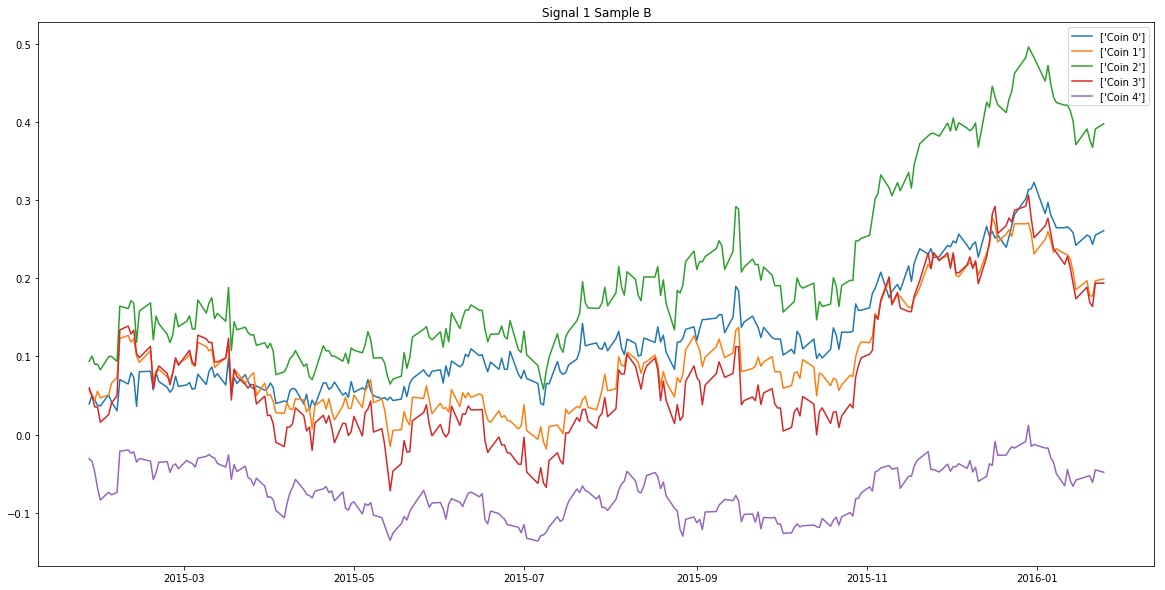

In [32]:
### Display actual signal 1 on sample B
plot_list_df(Signal_1B, 'Signal 1 Sample B')

In [33]:
def Get_SigB_new(Signal_1, opt_lam):
    signal_B = []
    for i in range(len(opt_lam)):
        series = Signal_1[i]
        signal_2 = series - series.ewm(alpha = opt_lam[i]).mean()
        signal_B.append(signal_2)
    return signal_B

In [34]:
Signal_2B = Get_SigB_new(Signal_1B, opt_lam)

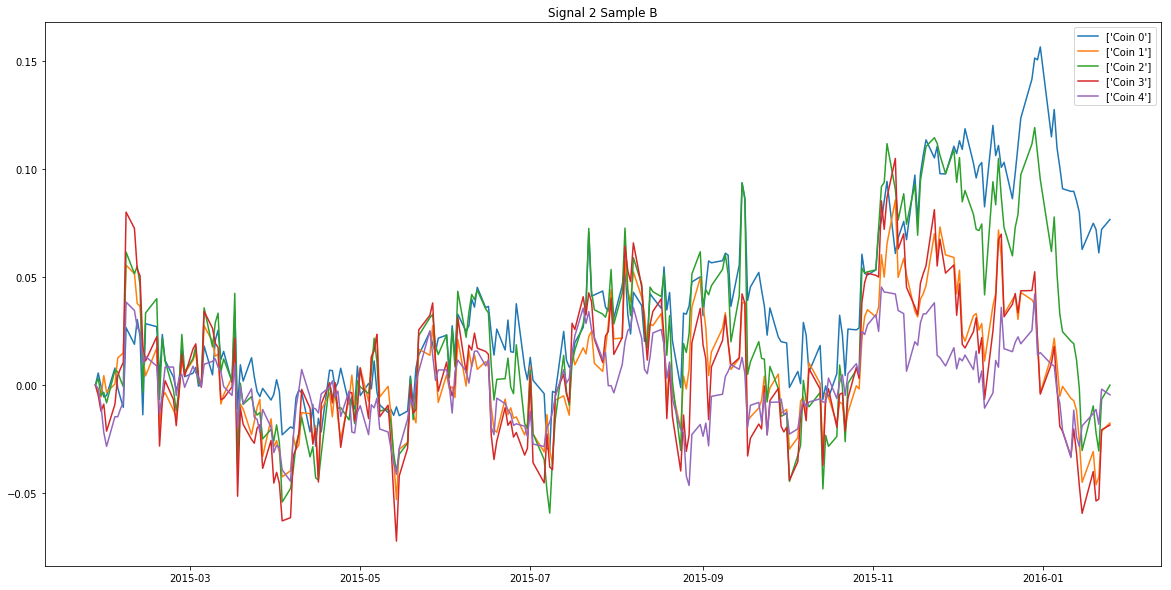

In [35]:
### Display actual signal2 on sample B
plot_list_df(Signal_2B, 'Signal 2 Sample B')

## Step 2 : Get Forecast Signal

### Forecast Signal 1

In [36]:
def AR_1_forecast(Series, n, param):
    y_pred = []
    series = np.array(Series)
    for i in range(len(Series) - n):
        pred = np.power(param[1],10)*series[i] + ((1 - np.power(param[1], 10))/(1 - param[1]))*param[0]
        y_pred.append(pred)
    df = pd.DataFrame(y_pred, index = Series[n:].index, columns = Series.columns)
    return df

In [37]:
def Forecast_Sig(signal_list, n, params):
    forecast = []
    for i in range(len(signal_list)):
        fore = AR_1_forecast(signal_list[i], n, params[i])
        forecast.append(fore)
    return forecast

In [38]:
Signal1_foreB = Forecast_Sig(Signal_1B, 10, params_sig1)

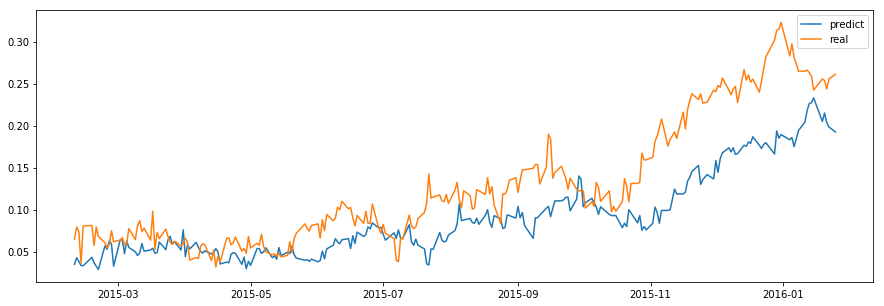

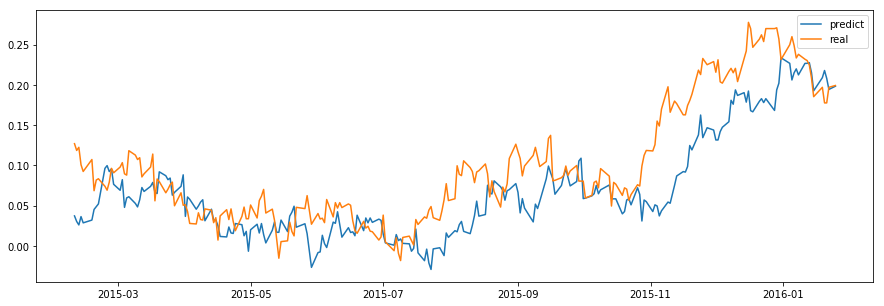

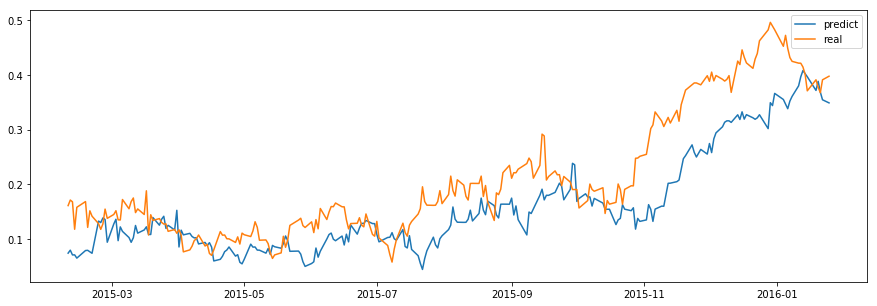

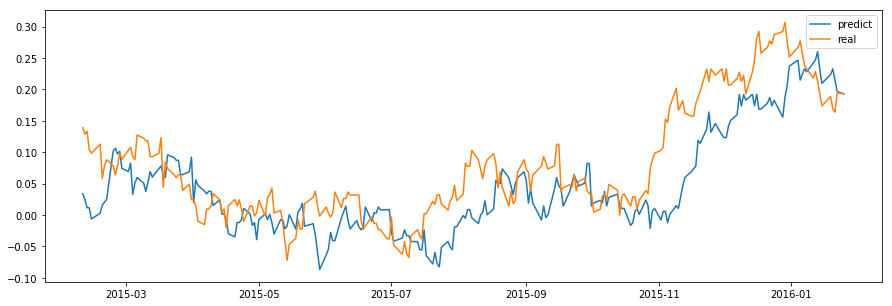

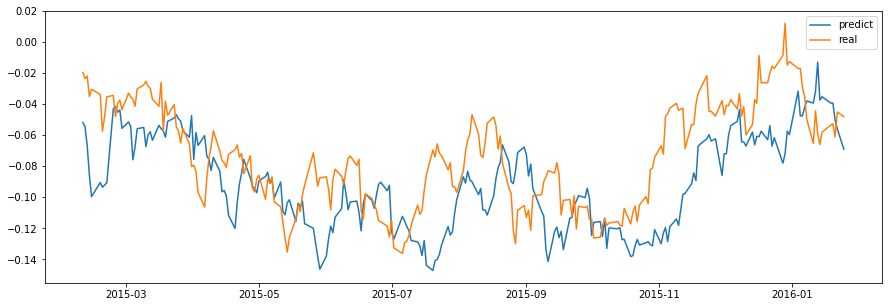

In [39]:
### Display the signal1 AR(1) prediction of each combination, compare them with actual values
for i in range(5):
    fig = plt.figure(figsize = (15,5))
    plt.plot(Signal1_foreB[i])
    plt.plot(Signal_1B[i][10:])
    plt.legend(['predict','real'])

In this part , we can see that there is a significant lag effect of prediction. The reason is that we only have information of time t, and AR(1) is a 'trend' model, the forecast depends on the trend before. Therefore, prediction 10 days later reflects the trend of today. 

### Forecast Signal 2

In [40]:
Signal2_foreB = Forecast_Sig(Signal_2B, 10, params_sig2)

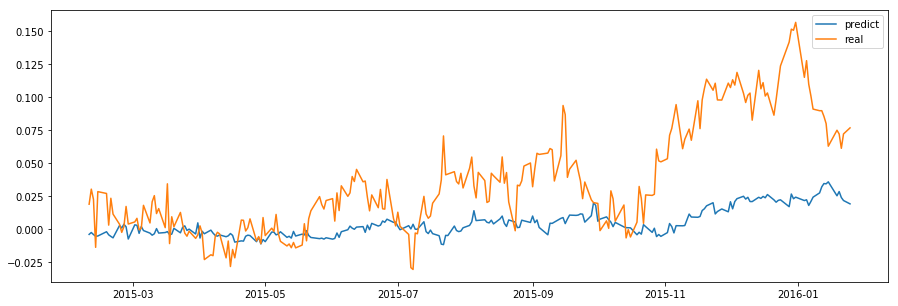

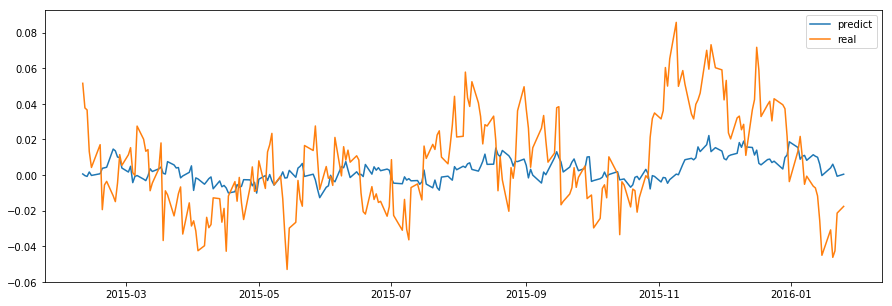

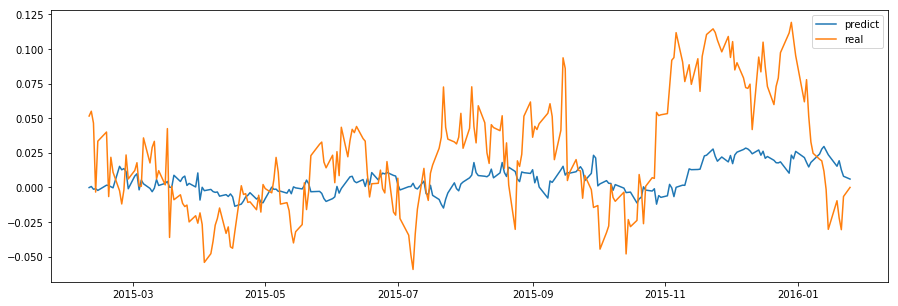

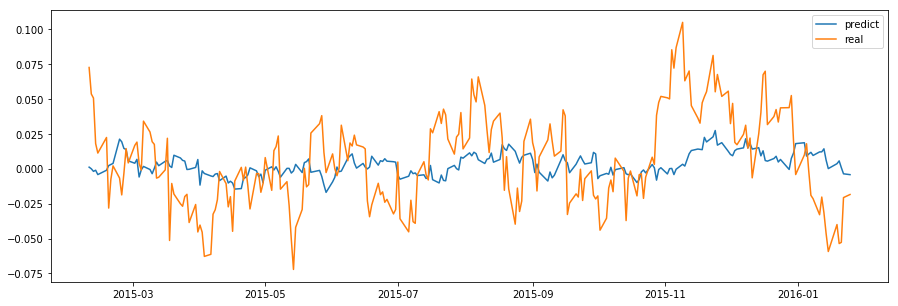

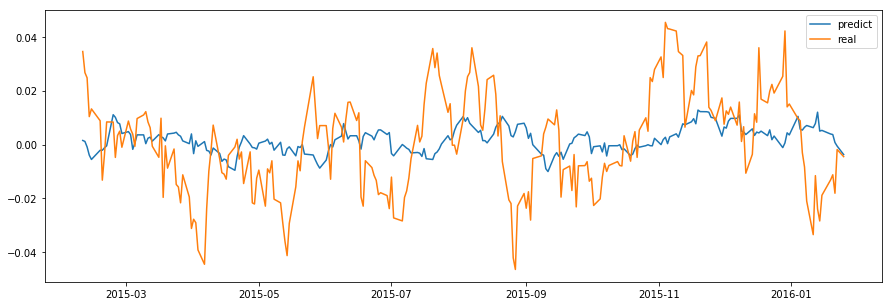

In [41]:
### Display the signal2 AR(1) prediction of each combination, compare them with actual values
for i in range(5):
    fig = plt.figure(figsize = (15,5))
    plt.plot(Signal2_foreB[i])
    plt.plot(Signal_2B[i][10:])
    plt.legend(['predict','real'])

In the prediction of signal2, we can find that the volatility of actual result is much more larger than the volatility of prediction. The reason is that the signal 2 is actually a white noise. AR(1) there is no significant trend of signal2. So AR(1) does not provide a reasonably good predicition of signal 2. Also, since the origninal magnitude of signal2 is not large and the 'decay' effect of the prediction of AR(1) model, the magnitude of the prediciton is underestimated. So, in the picture, we can see that the colatility of prediction is considerably small.

## Step 3 : Metrics I Level Correlation

In [42]:
from scipy.optimize import least_squares, leastsq

In [43]:
class Metrics1:
    ### Initial data and parameters
    def __init__(self, sig1, sig2, sig1_p, sig2_p, betas):
        self.sig1 = sig1
        self.sig2 = sig2
        self.sig1_p = sig1_p
        self.sig2_p = sig2_p
        self.sig3 = self.new_sig3(betas)
        self.sig3_pre = self.new_sig3_pre(betas)
    
    ### Update parameters
    def update_betas(self, betas):
        self.betas = betas
        self.sig3 = self.new_sig3(betas)
        self.sig3_pre = self.new_sig3_pre(betas)
    
    ### Calculate loading in case of changing of beta
    def new_sig3(self, betas):
        return (self.sig1*betas[0] + self.sig2*betas[1])
    
    def new_sig3_pre(self, betas):
        return self.sig1_p*betas[0] + self.sig2_p*betas[1]
    
    ### Calculate residuals and prepare for least square optimizor
    def residual(self, betas):
        ### Update new betas and new sig3
        self.update_betas(betas)
        ### Reduce the dimonsion, turn it to one-dimonsion array
        s3 = np.array(self.sig3)[:,0]
        s3_pre = np.array(self.sig3_pre)[:,0]
        ### Find the data that satisfy our alpha constrains : alpha > 0.25/10000
        New_sig3 = []
        New_sig3_pre = []
        for i in range(len(self.sig3_pre)):
            if abs(s3_pre[i] - s3[i]) > 0.25/10000:
                New_sig3.append(s3[i+10])
                New_sig3_pre.append(s3_pre[i])
        ### Compute the pearson correlation
        corr = np.corrcoef(np.array(New_sig3), np.array(New_sig3_pre))[0,1]
        ### Use 1 - corr as reesidual, so we can use least square to minimize the loss and get the largest correlation
        resid = 1 - corr
        return resid
    
    ### Use optimizor in scipy to get the optimal beta
    def optimization(self, betas_0):
        beta = least_squares(self.residual, betas_0, method = 'trf').x
        corr = 1 - self.residual(beta)
        return beta, corr

In [44]:
### Display the Betas values and corresponding correlation of each cvombinations
beta1_A = []
beta2_A = []
corr_list = []
for i in range(5):
    betas_0 = [0.5, 0.5]
    Me1 = Metrics1(Signal_1B[i], Signal_2B[i], Signal1_foreB[i], Signal2_foreB[i], betas_0)
    Op_betas, corr = Me1.optimization(betas_0)
    beta1_A.append(Op_betas[0])
    beta2_A.append(Op_betas[1])
    corr_list.append(corr)
dic = {'beta1':beta1_A, 'beta2':beta2_A, 'corr':corr_list}
pd.DataFrame(dic, index = index)


,beta1,beta2,corr
combination 1,0.882292,-0.924608,0.980335
combination 2,0.752776,-1.029759,0.980082
combination 3,0.804879,-0.988581,0.988282
combination 4,0.708515,-1.075332,0.972236
combination 5,0.999823,-1.414339,0.937072


We can find that we can choose a pair of betas to make the correlation of each combinations very close to 1. All of the reasult show that we long a signal 1 and short a signal 2 can provide the highest correlation of signal3(t+10) prediction and signal3(t+10) actual value. It is very easy to understand that signal1 is a time-variant variable and signal2 is a white noise. we long a signal 1 and short a signal 2 is actually to minus the white noise from the signal 1 and leave only time-variant variable which is highly predictable.

According to correlation, intuitively, higher prediction corresponds to higher actual value gives a correlation close to 1. Think it another way, if the correlation is close to 1, it means that when my prediction of signal1 is high relative to previous predictions, there is a high probabilities that true value of signal1 will be high relative to previous true values. So, a higher correlation between the prediction and actual value means a higher predictability of the signal.

## Step 4 : Metrics II OLS

In [45]:
class Metrics2:
    ### Initial data and parameters
    def __init__(self, sig1, sig2, sig1_p, sig2_p, betas):
        self.sig1 = sig1
        self.sig2 = sig2
        self.sig1_p = sig1_p
        self.sig2_p = sig2_p
        self.sig3 = self.new_sig3(betas)
        self.sig3_pre = self.new_sig3_pre(betas)
    
    ### Update parameters
    def update_betas(self, betas):
        self.betas = betas
        self.sig3 = self.new_sig3(betas)
        self.sig3_pre = self.new_sig3_pre(betas)
    
    ### Calculate loading in case of changing of beta
    def new_sig3(self, betas):
        return (self.sig1*betas[0] + self.sig2*betas[1])
    
    def new_sig3_pre(self, betas):
        return self.sig1_p*betas[0] + self.sig2_p*betas[1]
    
    ### Calculate residuals and prepare for least square optimizor
    def residual(self, betas):
        ### Update new betas and new sig3
        self.update_betas(betas)
        ### Reduce the dimonsion and make sure that they are one-dimonsion arrays
        s3 = np.array(self.sig3)[:,0]
        s3_pre = np.array(self.sig3_pre)[:,0]
        ### Find the data that satisfy our alpha constrains : alpha > 0.25/10000
        New_sig3 = []
        New_sig3_pre = []
        for i in range(len(self.sig3_pre)):
            if abs(s3_pre[i] - s3[i]) > 0.25/10000:
                New_sig3.append(s3[i+10])
                New_sig3_pre.append(s3_pre[i])
        ### We want to see if the OLS parameter is 1
        x = np.array(New_sig3)
        x = sm.add_constant(x)
        y = np.array(New_sig3_pre)
        para = sm.OLS(y, x).fit().params[1]
        ### Set the residual as 1 - parameters so that we could use least-square
        resid = 1 - para
        return resid
    
    ### Use optimizor in scipy to get the optimal beta
    def optimization(self, betas_0):
        beta = least_squares(self.residual, betas_0, method = 'trf').x
        para = 1 - self.residual(beta)
        return beta, para
    

In [46]:
### Display betas values and corresponding parameters of each combinations
beta1_B = []
beta2_B = []
para_list = []
for i in range(5):
    betas_0 = [0.5, 0.5]
    Me2 = Metrics2(Signal_1B[i], Signal_2B[i], Signal1_foreB[i], Signal2_foreB[i], betas_0)
    Op_betas, para = Me2.optimization(betas_0)
    beta1_B.append(Op_betas[0])
    beta2_B.append(Op_betas[1])
    para_list.append(para)
dic = {'beta1':beta1_B, 'beta2':beta2_B, 'parameters':para_list}
pd.DataFrame(dic, index = index)


,beta1,beta2,parameters
combination 1,1.298636,-1.199461,1.000000
combination 2,0.795862,-0.995793,0.921235
combination 3,0.730027,-1.046432,0.947437
combination 4,0.784939,-1.004490,0.917673
combination 5,1.145159,-1.311435,0.950950


In this part, I use OLS parameter as the second metrics to measure the signal quality. This metrics measures seems stronger than pearson correlation since it not only measures the relative relationship between the prediction and actual value, it also measures if the slope is 1. In more details, if OLS parameter is 1, it means that when my prediction of signal1 is high relative to previous predictions, there is a high probabilities that true value of signal1 will be high relative to previous true values. Meanwhile, when my prediction moves forward relative to previous prediction, the real value have a great possibility to move foward a same increment.

Use this metrics to find the betas pairs and the result is similar to that we use pearson correlation. So the interpretation is the same. We long a signal 1 and short a signal 2 is exactly to minus the white noise from the signal 1 and get a highly predictable time-variant variables.

## Step 5 : Metrics III Spearman Correlation

In [47]:
from scipy.stats import spearmanr
def Spearman_corr_op(Signal_1B, Signal_2B, Signal1_foreB, Signal2_foreB):
    beta1 = np.arange(-1.5, 1.5, 0.05)
    beta2 = np.arange(-1.5, 1.5, 0.05)
    ### Calculate spearman correlation
    def sp_corr(Signal_1B, Signal_2B, Signal1_foreB, Signal2_foreB, betas):
        sig3 = Signal_1B*betas[0] + Signal_2B*betas[1]
        sig3_p = Signal1_foreB*betas[0] + Signal2_foreB*betas[1]
        s3 = np.array(sig3)[:,0]
        s3_pre = np.array(sig3_p)[:,0]
        New_sig3 = []
        New_sig3_pre = []
        ### check constraints
        for i in range(len(sig3_p)):
            if abs(s3_pre[i] - s3[i]) > 0.25/10000:
                New_sig3.append(s3[i+10])
                New_sig3_pre.append(s3_pre[i])
        return spearmanr(np.array(New_sig3), np.array(New_sig3_pre))[0]
    ### Find the opttimal betas
    beta1_list = []
    beta2_list = []
    corr_list = []
    ### Outer loops for beta1
    for i in range(len(beta1)):
        ### Inner loops for beta2
        for j in range(len(beta2)):
            beta1_list.append(beta1[i])
            beta2_list.append(beta2[j])
            betas = [beta1[i], beta2[j]]
            corr_list.append(1 - sp_corr(Signal_1B, Signal_2B, Signal1_foreB, Signal2_foreB, betas))
    ### Analysis all the result and find the best one
    dic = {'beta_1':beta1_list, 'beta_2':beta2_list, '1 - corr':corr_list}
    df = pd.DataFrame(dic)
    optimal_line = np.array(df.sort_values(by = ['1 - corr'], ascending = 1).iloc[0,:])
    optimal_beta = [optimal_line[0], optimal_line[1]]
    corr = 1 - optimal_line[2]
    return optimal_beta, corr

In [48]:
beta1_C = []
beta2_C = []
corr_list_sp = []
for i in range(5):
    Op_betas, corr = Spearman_corr_op(Signal_1B[i], Signal_2B[i], Signal1_foreB[i], Signal2_foreB[i])
    beta1_C.append(Op_betas[0])
    beta2_C.append(Op_betas[1])
    corr_list_sp.append(corr)
dic = {'beta1':beta1_C, 'beta2':beta2_C, 'spearman correlation':corr_list_sp}
pd.DataFrame(dic, index = index)

,beta1,beta2,spearman correlation
combination 1,-1.25,1.35,0.954822
combination 2,1.05,-1.50,0.940678
combination 3,-1.15,1.40,0.959206
combination 4,-0.75,1.15,0.940285
combination 5,1.05,-1.50,0.930556


In the part, I use a third metrics : spearman correlation to measure the rank correlation between the prediction and the actual value. Since it's a rank correlation, it may not be as accurate as the previous metrics on showing the relattionship between the prediction and the actual value. The advantage of spearman correlation is it can get rid of the effect of extreme points. At the same time, it can also tell us if increment in prediction will lead to a same rank move of the actual value. In this case, we can easily find that the beta1 and beta2 also shows a long signal 1  short signal 2 or long signal 2 short signal 1. The core here is also to minus the white noise from the signal 1.

## Question 6 

### Run your signal quality analysis using a testing sample C. Break the test sample into 4 quarters, and see how your results evolve from quarter to quarter. Analyze all results.

In [49]:
### Get Signal1 & 2 , actual & prediction on sample C
Signal_1C = Get_sigA(sample_C, weight_list, pair_list)
Signal_2C = Get_SigB_new(Signal_1C, opt_lam)
Signal1_foreC = Forecast_Sig(Signal_1C, 10, params_sig1)
Signal2_foreC = Forecast_Sig(Signal_2C, 10, params_sig2)

In [50]:
def data_pre(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC):
    signal3 = []
    signal3_p = []
    ### Get signal 3 & prediction
    for i in range(len(Signal_1C)):
        sig3 = Signal_1C[i]*beta1[i] + Signal_2C[i]*beta2[i]
        sig3_p = Signal1_foreC[i]*beta1[i] + Signal2_foreC[i]*beta2[i]
        s3 = np.array(sig3)[:,0]
        s3_pre = np.array(sig3_p)[:,0]
        New_sig3 = []
        New_sig3_pre = []
        ### check constraints
        for i in range(len(sig3_p)):
            if abs(s3_pre[i] - s3[i]) > 0.25/10000:
                New_sig3.append(s3[i+10])
                New_sig3_pre.append(s3_pre[i])
        signal3.append(np.array(New_sig3))
        signal3_p.append(np.array(New_sig3_pre))
    return signal3, signal3_p      

In [51]:
def Get_SamC_Result(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC, metrics):
    sig3, sig3_p = data_pre(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC)  
    dic = {}
    ### for each combninations
    for i in range(5):
        ### Split 4 quarters
        split = int(len(sig3[i])/4)
        ival = [[0,split], [split+1,2*split], [2*split+1, 3*split], [3*split+1, len(sig3[i])]]
        para_list = []
        ### for each quarters
        for j in range(4):
            corr = np.corrcoef(sig3[i][ival[j][0]:ival[j][1]], sig3_p[i][ival[j][0]:ival[j][1]])[0,1]
            para_list.append(corr)
        name = 'combination ' + str(i+1)
        dic[name] = para_list
    df = pd.DataFrame(dic)
    ### get index
    index_list = []
    for i in range(4):
        name = metrics + ' Quarter ' + str(i+1)
        index_list.append(name)
    df.index = index_list   
    return df   

In [52]:
### Display how my results evolve from quarter to quarter
Get_SamC_Result(beta1_A, beta2_A, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC,'corr')

,combination 1,combination 2,combination 3,combination 4,combination 5
corr Quarter 1,0.794840,0.764325,0.839948,0.755523,0.695173
corr Quarter 2,0.824841,0.886448,0.889784,0.848949,0.787573
corr Quarter 3,0.736212,0.805687,0.841015,0.714485,0.547293
corr Quarter 4,0.946836,0.974302,0.972836,0.973046,0.956902


For metrics 1 : Pearson Correlation

We can see from the chart that the correlation is highest at the fourth quarter in every combinations. Although, there exists some part that the correlation is not high, overall, the correlation is above 0.8. it shows that our prediction has a very high correlation with the actual value. Which means that if we predict the signal 3 will increase, there is a high probability that the actual value of signal 3 will increase. So our signal 3 is highly predictability even out of sample.

In [53]:
def Get_SamC_Para(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC, metrics):
    sig3, sig3_p = data_pre(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC)  
    dic = {}
    ### for each combination
    for i in range(5):
        ### split 4 quarters
        split = int(len(sig3[i])/4)
        ival = [[0,split], [split+1,2*split], [2*split+1, 3*split], [3*split+1, len(sig3[i])]]
        para_list = []
        ### for each quarters
        for j in range(4):
            x = sig3[i][ival[j][0]:ival[j][1]]
            x = sm.add_constant(x)
            y = sig3_p[i][ival[j][0]:ival[j][1]]
            para = sm.OLS(y, x).fit().params[1]
            para_list.append(para)
            
        name = 'combination ' + str(i+1)
        dic[name] = para_list
    df = pd.DataFrame(dic)
    ### get index
    index_list = []
    for i in range(4):
        name = metrics + ' Quarter ' + str(i+1)
        index_list.append(name)
    df.index = index_list   
    return df   

In [54]:
### Display Display how my results evolve from quarter to quarter
Get_SamC_Para(beta1_B, beta2_B, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC,'para')

,combination 1,combination 2,combination 3,combination 4,combination 5
para Quarter 1,0.846284,0.963907,0.768157,0.870022,0.871037
para Quarter 2,1.652474,1.084189,0.928676,0.955674,0.998504
para Quarter 3,1.330430,0.826951,0.795868,0.777535,0.959842
para Quarter 4,1.227924,0.914305,0.900806,0.934245,0.959598


For Metrics 2: OLS Parameter

We can easily find that all the combinations has a stable OLS parameter near to 1 except combination1. It means that if we predict that the signal 3 will move forward, the actual signal 3 value will have a high probability to move forward and almost the same increment as we predict. 

The reason that combination1 performs not good out of sample is that the short-term rate will change as the policy and macro factors change. However, long-term rate are much more stable. So, if we want to make combination 1 performs well, we have to update the model parameters on time. This trend can also be observed in the table above. The combination 5, (5Y,7Y)'s OLS parameter is stable from the second quarter till the end.

In [55]:
def Get_SamC_spearman(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC, metrics):
    sig3, sig3_p = data_pre(beta1, beta2, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC)  
    dic = {}
    ### for each combninations
    for i in range(5):
        ### Split 4 quarters
        split = int(len(sig3[i])/4)
        ival = [[0,split], [split+1,2*split], [2*split+1, 3*split], [3*split+1, len(sig3[i])]]
        para_list = []
        ### for each quarters
        for j in range(4):
            corr = spearmanr(sig3[i][ival[j][0]:ival[j][1]], sig3_p[i][ival[j][0]:ival[j][1]])[0]
            para_list.append(corr)
        name = 'combination ' + str(i+1)
        dic[name] = para_list
    df = pd.DataFrame(dic)
    ### get index
    index_list = []
    for i in range(4):
        name = metrics + ' Quarter ' + str(i+1)
        index_list.append(name)
    df.index = index_list   
    return df 

In [56]:
### Display Display how my results evolve from quarter to quarter
Get_SamC_spearman(beta1_C, beta2_C, Signal_1C, Signal_2C, Signal1_foreC, Signal2_foreC,'spearman corr')

,combination 1,combination 2,combination 3,combination 4,combination 5
spearman corr Quarter 1,0.862073,0.642290,0.843734,0.623210,0.650181
spearman corr Quarter 2,0.823437,0.886908,0.876037,0.828755,0.784570
spearman corr Quarter 3,0.685213,0.753185,0.795032,0.713968,0.477382
spearman corr Quarter 4,0.916658,0.935537,0.927393,0.921311,0.912322


It can also be observed that the metrics is the best at quarter 4 where all spearman correlation is higher than 0.9. In other quarters, the result is not good. Some of them is even 0.6 or even 0.5. That may be caused by shocks on the market which caused the yield curve to move suddenly and the magnitude is so large that changes a lot on rankings. 

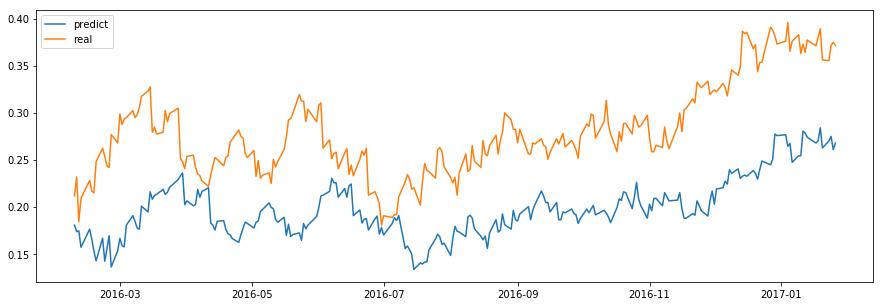

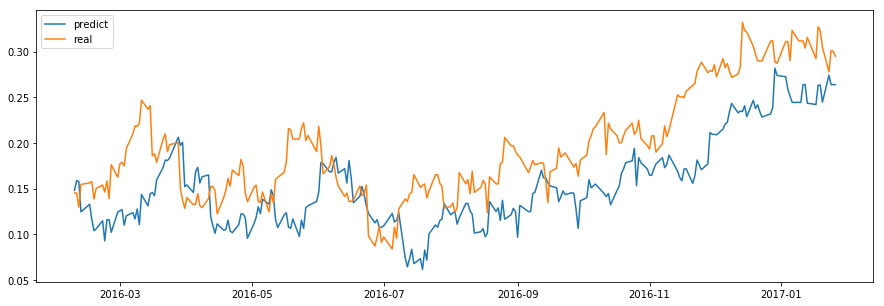

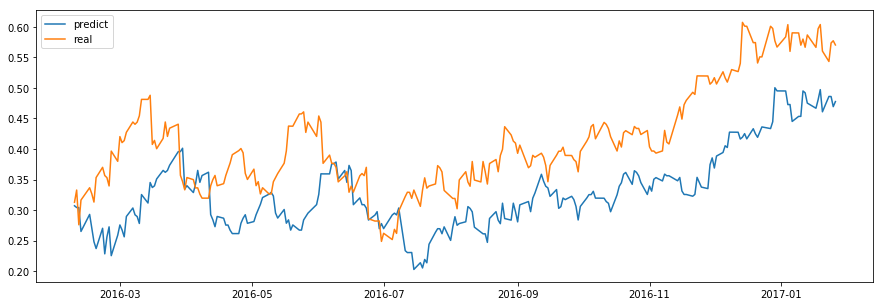

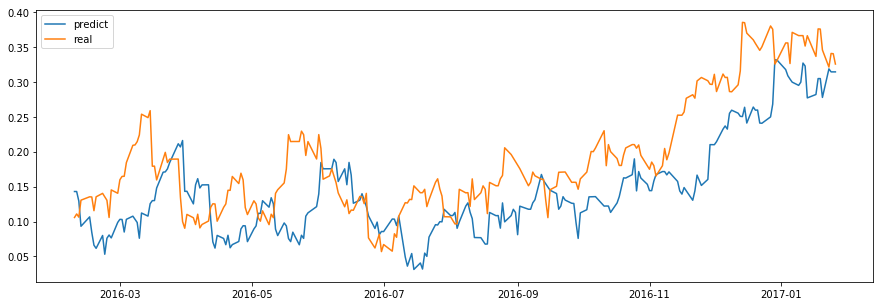

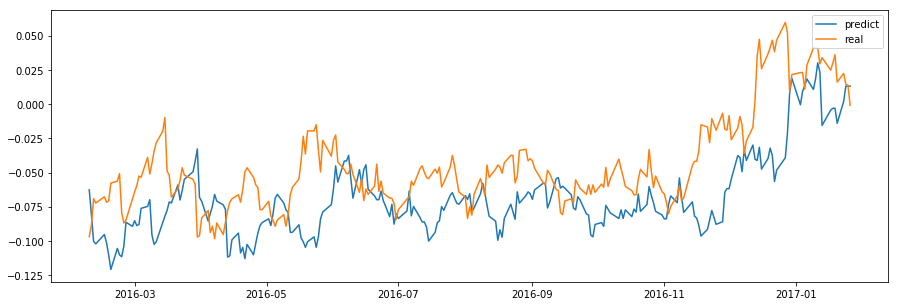

In [57]:
### Display the signal1 AR(1) prediction of each combination on sample C, compare them with actual values
for i in range(5):
    fig = plt.figure(figsize = (15,5))
    plt.plot(Signal1_foreC[i])
    plt.plot(Signal_1C[i][10:])
    plt.legend(['predict','real'])

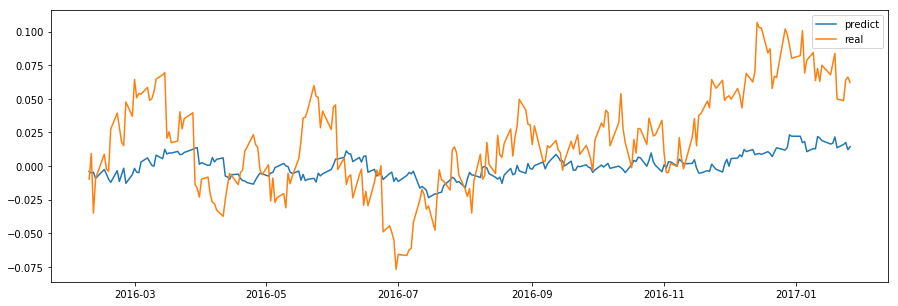

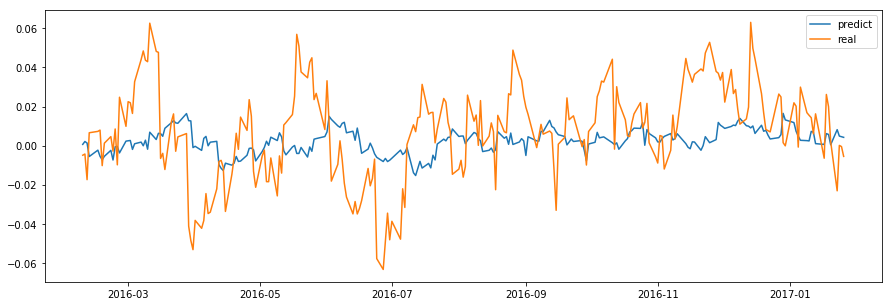

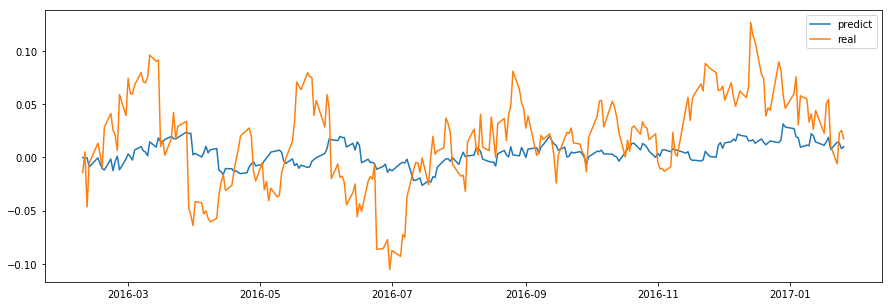

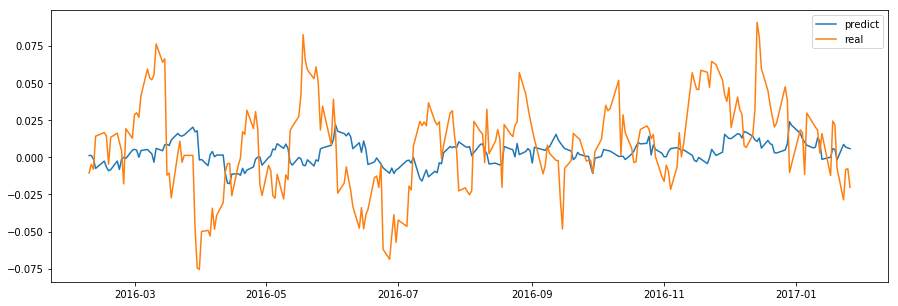

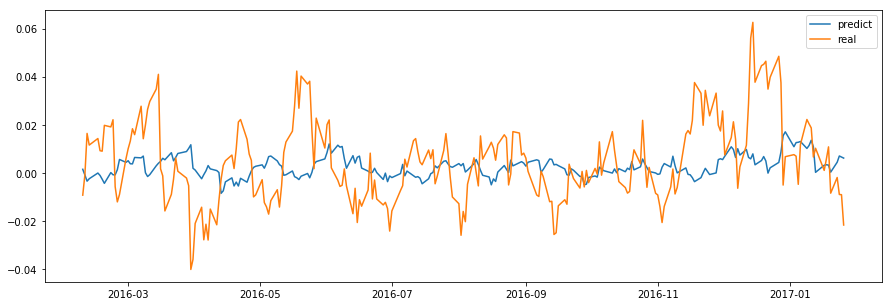

In [58]:
### Display the signal2 AR(1) prediction of each combination on sample C, compare them with actual values
for i in range(5):
    fig = plt.figure(figsize = (15,5))
    plt.plot(Signal2_foreC[i])
    plt.plot(Signal_2C[i][10:])
    plt.legend(['predict','real'])